In [19]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [20]:
dataset=pd.read_csv("dataset.csv",sep=";")

In [21]:
dataset.drop(["node"],inplace=True,axis=1)

In [22]:
dataset["date"]=pd.to_datetime(dataset["date"],format="%Y-%m-%d %H:%M:%S")

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242968 entries, 0 to 2242967
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   consumption  float64       
 1   substation   object        
 2   date         datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 51.3+ MB


In [24]:
dataset.head()

,consumption,substation,date
0,-2.762882,AJAHUEL,2017-04-01
1,-119.559726,BUIN,2017-04-01
2,64.807776,BUIN,2017-04-01
3,-4.348032,LOSALME,2017-04-01
4,69.637895,LOSALME,2017-04-01


In [25]:
train=dataset.query("date.dt.year>2017 and date.dt.year <2022")

In [26]:
test=dataset.query("date.dt.year==2022")

In [27]:
serie_test=test.groupby(["substation","date"]).agg("sum")
serie_test.to_csv("test.csv")

In [28]:
serie_train=train.groupby(["substation","date"]).agg("sum")
serie_train.to_csv("train.csv")

In [29]:
ds_train=pd.read_csv("train.csv")
ds_train["date"]=pd.to_datetime(ds_train["date"],format="%Y-%m-%d %H:%M:%S")
ds_train=ds_train.set_index("date")
ds_train.head(-5)

,substation,consumption
date,,
2018-01-01 00:00:00,AJAHUEL,137.330840
2018-01-01 01:00:00,AJAHUEL,124.045549
2018-01-01 02:00:00,AJAHUEL,118.137811
2018-01-01 03:00:00,AJAHUEL,107.899499
2018-01-01 04:00:00,AJAHUEL,100.362069
...,...,...
2021-12-31 14:00:00,LOSALME,173.281029
2021-12-31 15:00:00,LOSALME,170.696485
2021-12-31 16:00:00,LOSALME,170.537953


In [30]:
ds_test=pd.read_csv("test.csv")
ds_test["date"]=pd.to_datetime(ds_test["date"],format="%Y-%m-%d %H:%M:%S")
ds_test=ds_test.set_index("date")
ds_test.head(-5)

,substation,consumption
date,,
2022-01-01 00:00:00,AJAHUEL,102.093131
2022-01-01 01:00:00,AJAHUEL,82.379086
2022-01-01 02:00:00,AJAHUEL,75.126780
2022-01-01 03:00:00,AJAHUEL,69.140084
2022-01-01 04:00:00,AJAHUEL,66.442176
...,...,...
2022-12-31 14:00:00,LOSALME,126.068562
2022-12-31 15:00:00,LOSALME,123.914380
2022-12-31 16:00:00,LOSALME,120.936187


In [31]:
subestaciones=["AJAHUEL","BUIN","CHENA","CNAVIA","ELSALTO","FLORIDA","LOSALME"]

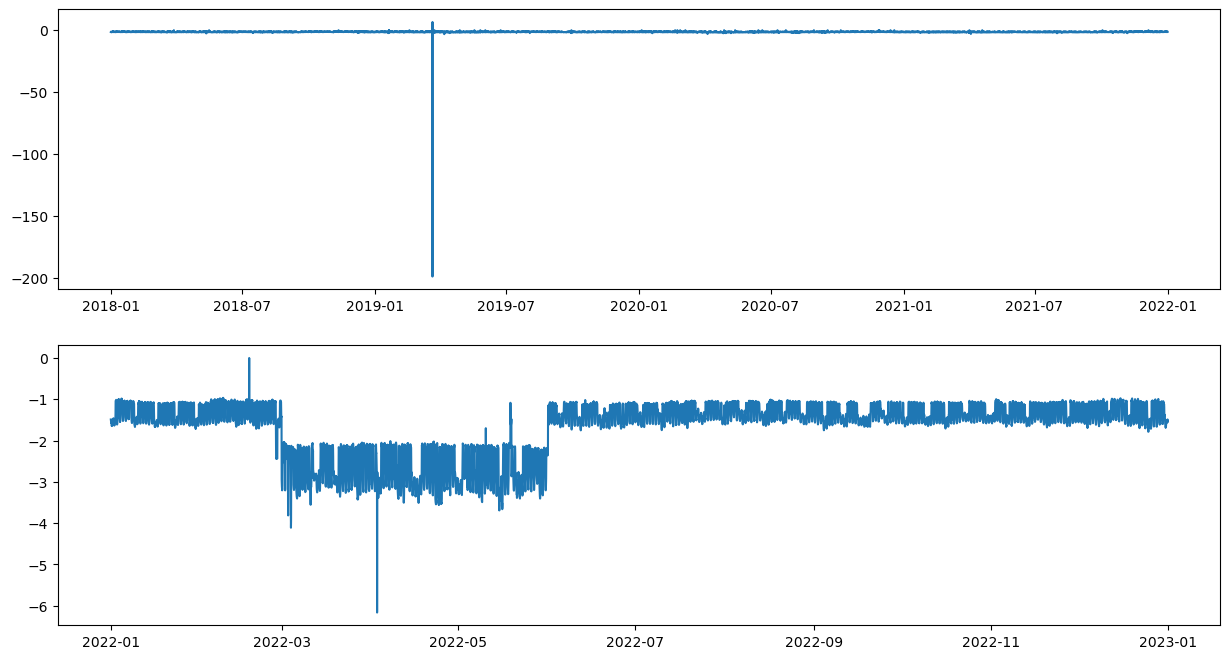

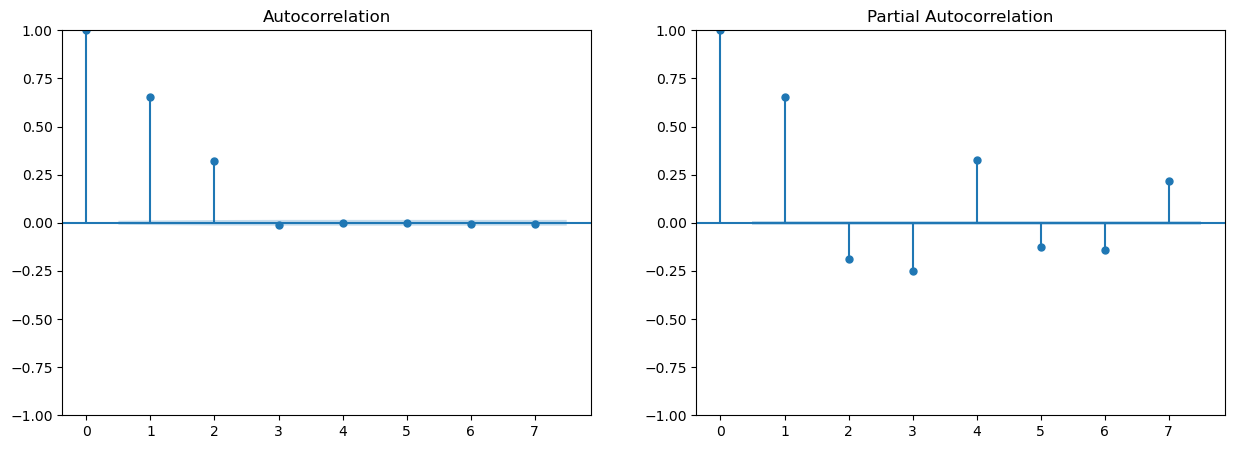

In [32]:
#Analisis estadistico de BUIN
subestacion="BUIN"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

<Axes: xlabel='hour', ylabel='consumption'>

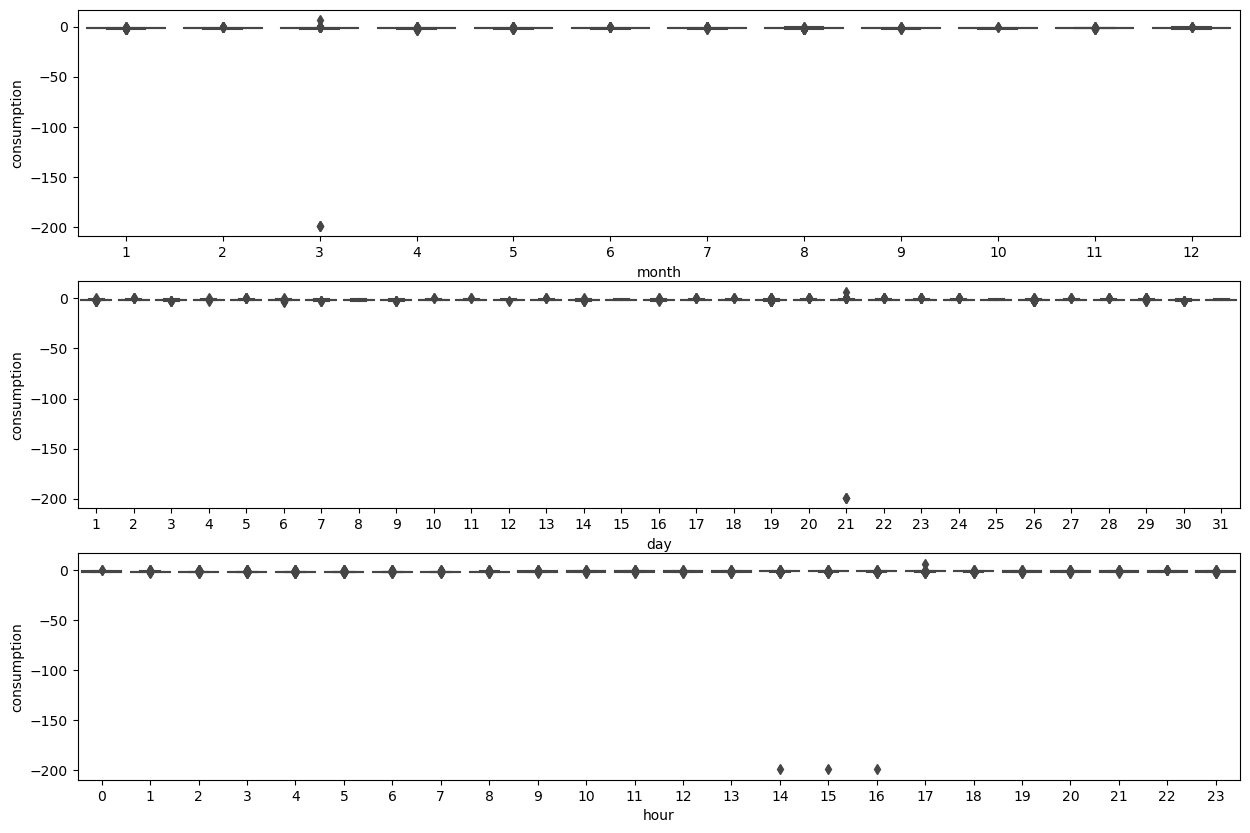

In [33]:
import seaborn as sns

data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="month", y="consumption",data=data,ax=axes[0])
sns.boxplot(x="day", y="consumption",data=data,ax=axes[1])
sns.boxplot(x="hour", y="consumption",data=data,ax=axes[2])

In [34]:
data["year"]=data["date"].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34913 entries, 2018-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   consumption  34913 non-null  float64       
 1   date         34913 non-null  datetime64[ns]
 2   day          34913 non-null  int64         
 3   hour         34913 non-null  int64         
 4   month        34913 non-null  int64         
 5   year         34913 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.9 MB


In [35]:
data.head()

,consumption,date,day,hour,month,year
date,,,,,,
2018-01-01 00:00:00,-1.469724,2018-01-01 00:00:00,1,0,1,2018
2018-01-01 01:00:00,-1.485837,2018-01-01 01:00:00,1,1,1,2018
2018-01-01 02:00:00,-1.509146,2018-01-01 02:00:00,1,2,1,2018
2018-01-01 03:00:00,-1.536619,2018-01-01 03:00:00,1,3,1,2018
2018-01-01 04:00:00,-1.564093,2018-01-01 04:00:00,1,4,1,2018


In [36]:
data_buin=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")
data_buin.to_csv("data_ys_buin.csv")

In [37]:
from datetime import datetime
ys=[]
xs=[]
archivo=open("data_ys_buin.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

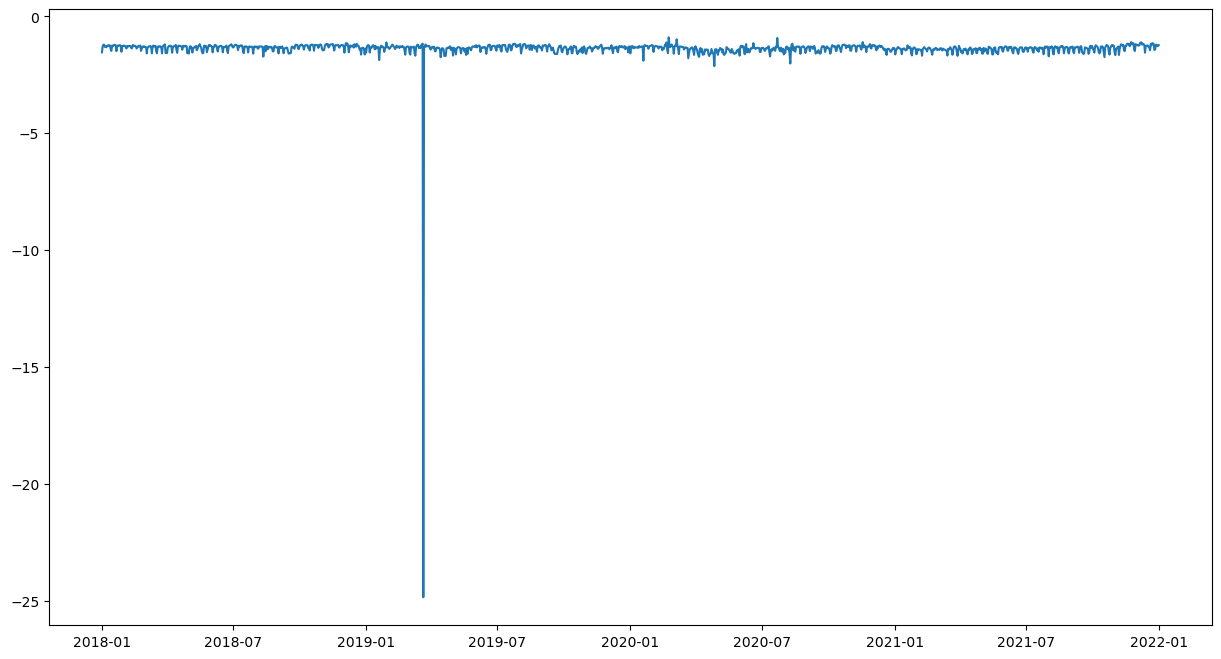

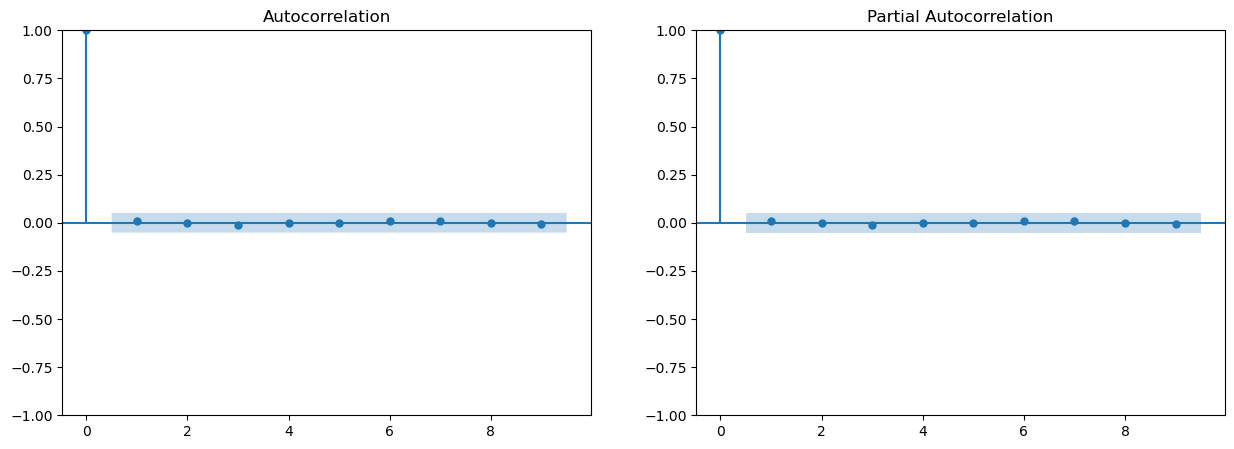

In [20]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [21]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -37.919792
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


Estadistico ADF: -37,919792 indica la estadistica de la prueba calculada. Un valor mas negativo sugiere una mayor evidencia contra la hipotesis nula de que hay una raiz unitaria presente en la serie de tiempo, lo que significa que es mas probable que la serie sea estacionaria
p value < 0,05, la serie es estacionaria.
el estadistico ADF es mucho mas negativo que cualquiera de los valores criticos, lo que significa que se puede rechazar la hipotesis nula con un alto nivel de confianza.
### Es decir, la serie de tiempo es estacionaria

In [22]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import numpy as np

In [23]:
# Encontrar el mejor modelo ARIMA
modelo_auto = auto_arima(ys, seasonal=False, trace=True)
# Obtener los términos óptimos del modelo ARIMA
best_order = modelo_auto.get_params()['order']
# Ajustar el modelo ARIMA con los términos óptimos
modelo_losalme_d = ARIMA(ys, order=best_order)
m_ad1 = modelo_losalme_d.fit()
# Calcular el error cuadrático medio
mse = m_ad1.mse
# Calcular el criterio de información de Akaike (AIC)
aic = m_ad1.aic
# Realizar predicciones
ysp = m_ad1.predict()
# Calcular el error porcentual absoluto medio (MAPE)
mape = mean_absolute_percentage_error(ys, ysp)

# Imprimir las métricas de evaluación
print("MSE:", mse)
print("AIC:", aic)
print("MAPE:", mape)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.80 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5361.243, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3658.502, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4589.097, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3332.546, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3193.228, Time=0.10 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3109.093, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=3055.439, Time=0.18 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=1.35 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=1.09 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=2793.577, Time=0.32 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2791.581, Time=0.27 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2789.586, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2787.743, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2785.7

In [24]:
modelo_buin=ARIMA(ys,order=(0,0,0))#Parametros escogidos a partir de auto arima
m_ad1=modelo_buin.fit()
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

MSE 0.3925093893578751
AIC 2783.818761836187
MAPE 0.07375177341451954


In [25]:
modelo_buin=ARIMA(ys,order=(3,0,3))#Parametros escogidos a partir de lo visto en clases.
m_ad1=modelo_buin.fit()
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

MSE 0.39238665834530506
AIC 2795.3634947665846
MAPE 0.07341833895851502


Modelo Arima

El error cuadrado medio no es muy alto, pero tampoco es muy auspicioso. 
El AIC sirve para comparar el rendimiento con el AIC de otros modelos.
El MAPE sugiere que el modelo tiene un buen rendimiento,  las predicciones estan bastante cerca de los valores reales en promedio.

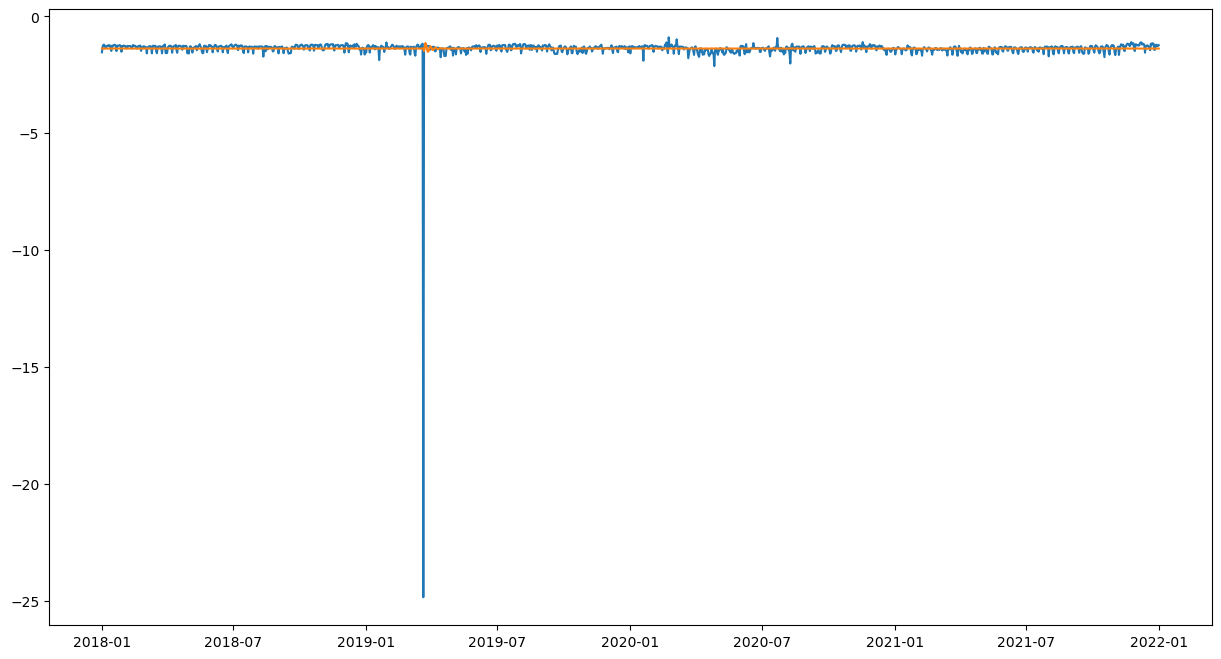

In [26]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys,xs,ysp);

In [27]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

1453


In [28]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [29]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import SimpleRNN, Input, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

In [30]:
seed=16011996
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [31]:
model = Sequential()
model.add(Input(name="serie",shape=(8,1)))
model.add(SimpleRNN(256))
model.add(Dense(128))
model.add(Dense(1, activation='linear'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               66048     
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 99073 (387.00 KB)
Trainable params: 99073 (387.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
tag="rnn_buin"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = 'logs\\fit\\' + tag 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'\\model_buin_{0}.keras'.format(tag))
#batch de 32 implica un peor rendimiento notablemente. Lo mismo pero en menor medida para batch de 512.


Epoch 1/200


6/6 [==============================] - 2s 41ms/step - loss: 2.0145 - mse: 2.0145 - mae: 1.1258 - mape: 82.0313
Epoch 2/200
6/6 [==============================] - 0s 21ms/step - loss: 0.6926 - mse: 0.6926 - mae: 0.5173 - mape: 37.2216
Epoch 3/200
6/6 [==============================] - 0s 20ms/step - loss: 0.5009 - mse: 0.5009 - mae: 0.3198 - mape: 22.2594
Epoch 4/200
6/6 [==============================] - 0s 20ms/step - loss: 0.4514 - mse: 0.4514 - mae: 0.2270 - mape: 15.6692
Epoch 5/200
6/6 [==============================] - 0s 20ms/step - loss: 0.4208 - mse: 0.4208 - mae: 0.1845 - mape: 12.6030
Epoch 6/200
6/6 [==============================] - 0s 20ms/step - loss: 0.4266 - mse: 0.4266 - mae: 0.1765 - mape: 11.4411
Epoch 7/200
6/6 [==============================] - 0s 20ms/step - loss: 0.4157 - mse: 0.4157 - mae: 0.1678 - mape: 11.5612
Epoch 8/200
6/6 [==============================] - 0s 20ms/step - loss: 0.4014 - mse: 0.4014 - mae: 0.1122 - mape: 6.8977
Epoch 9/200
6/

6/6 [==============================] - 0s 19ms/step - loss: 0.3941 - mse: 0.3941 - mae: 0.1039 - mape: 6.5151
Epoch 129/200
6/6 [==============================] - 0s 19ms/step - loss: 0.3964 - mse: 0.3964 - mae: 0.1036 - mape: 6.3638
Epoch 130/200
6/6 [==============================] - 0s 19ms/step - loss: 0.3942 - mse: 0.3942 - mae: 0.0973 - mape: 5.9205
Epoch 131/200
6/6 [==============================] - 0s 20ms/step - loss: 0.3922 - mse: 0.3922 - mae: 0.0952 - mape: 5.8106
Epoch 132/200
6/6 [==============================] - 0s 19ms/step - loss: 0.3932 - mse: 0.3932 - mae: 0.1076 - mape: 6.8100
Epoch 133/200
6/6 [==============================] - 0s 19ms/step - loss: 0.3948 - mse: 0.3948 - mae: 0.1060 - mape: 6.5561
Epoch 134/200
6/6 [==============================] - 0s 19ms/step - loss: 0.3926 - mse: 0.3926 - mae: 0.0982 - mape: 5.9953
Epoch 135/200
6/6 [==============================] - 0s 19ms/step - loss: 0.3925 - mse: 0.3925 - mae: 0.1036 - mape: 6.4987
Epoch 136/200
6/6 [===

#### Mejor resultado obtenido sin shuffle:
rnn = model.fit(yw, yt, batch_size=256, epochs=200,verbose=1,callbacks=[tensorboard_callback])

Epoch 193/200
6/6 [==============================] - 0s 21ms/step - loss: 0.3925 - mse: 0.3925 - mae: 0.0916 - mape: 5.3931

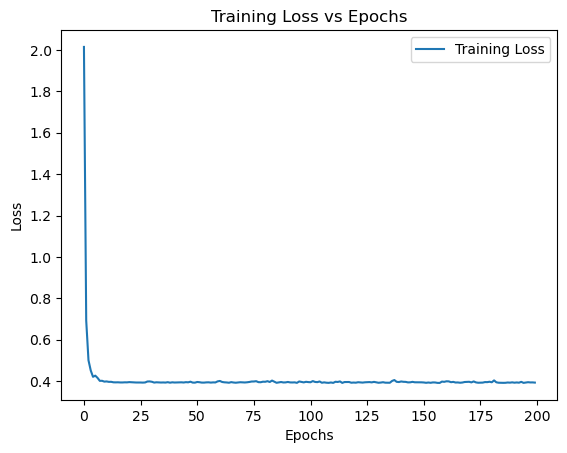

In [33]:
plt.plot(rnn.history['loss'], label='Training Loss')
plt.title('Training Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

46/46 [==============================] - 0s 2ms/step


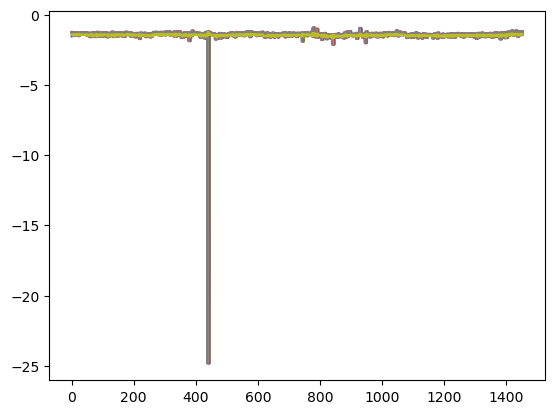

In [33]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

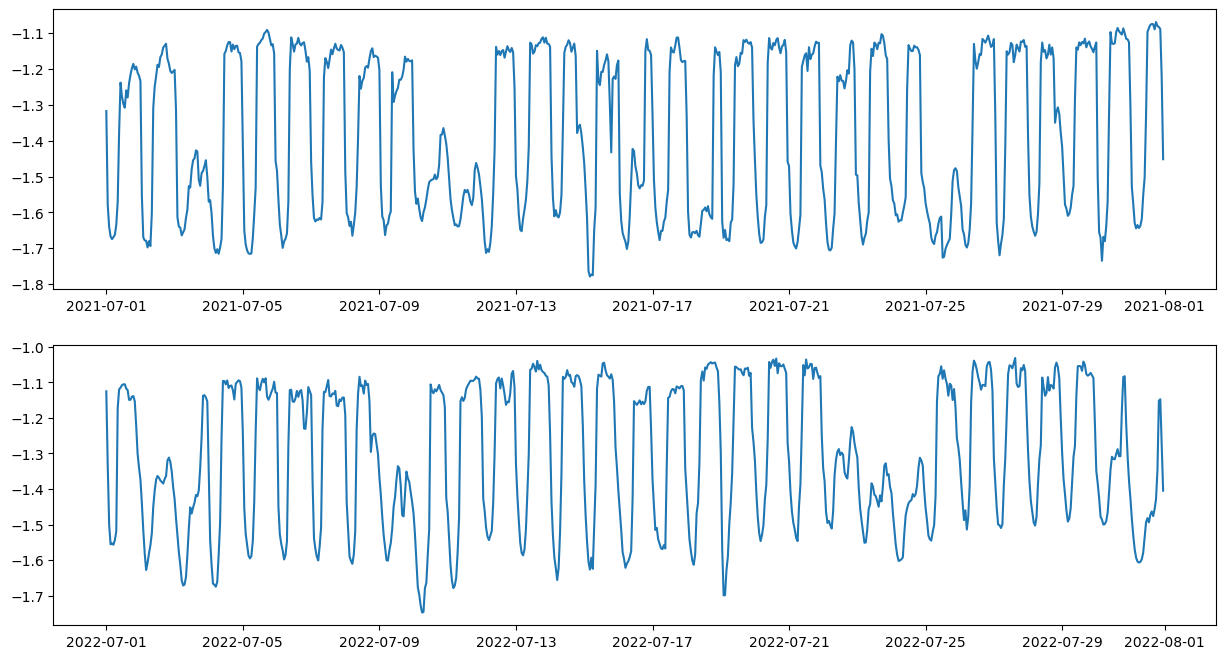

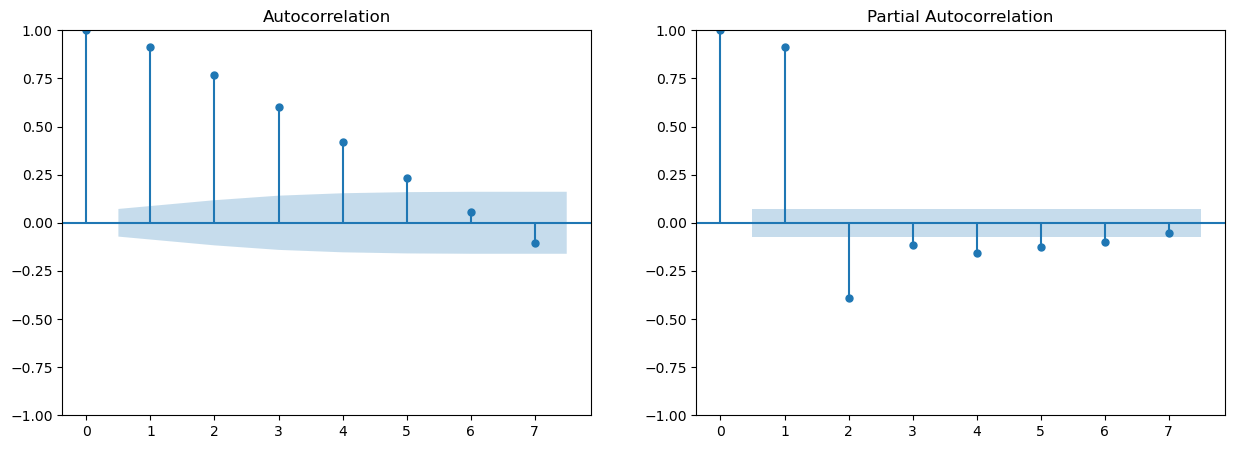

In [34]:
subestacion="BUIN"
filtro="substation=='{0}' and date.dt.year==2021 and date.dt.month==7".format(subestacion)
ym=ds_train.query(filtro)["consumption"]
xm=ds_train.query(filtro).index
filtro="substation=='{0}' and date.dt.year==2022 and date.dt.month==7".format(subestacion)
ytm=ds_test.query(filtro)["consumption"]
xtm=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(xm,ym);
axes[1].plot(xtm,ytm);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ym,lags=7,ax=axes[0]);
plot_pacf(ym,lags=7,method="ywm",ax=axes[1]);

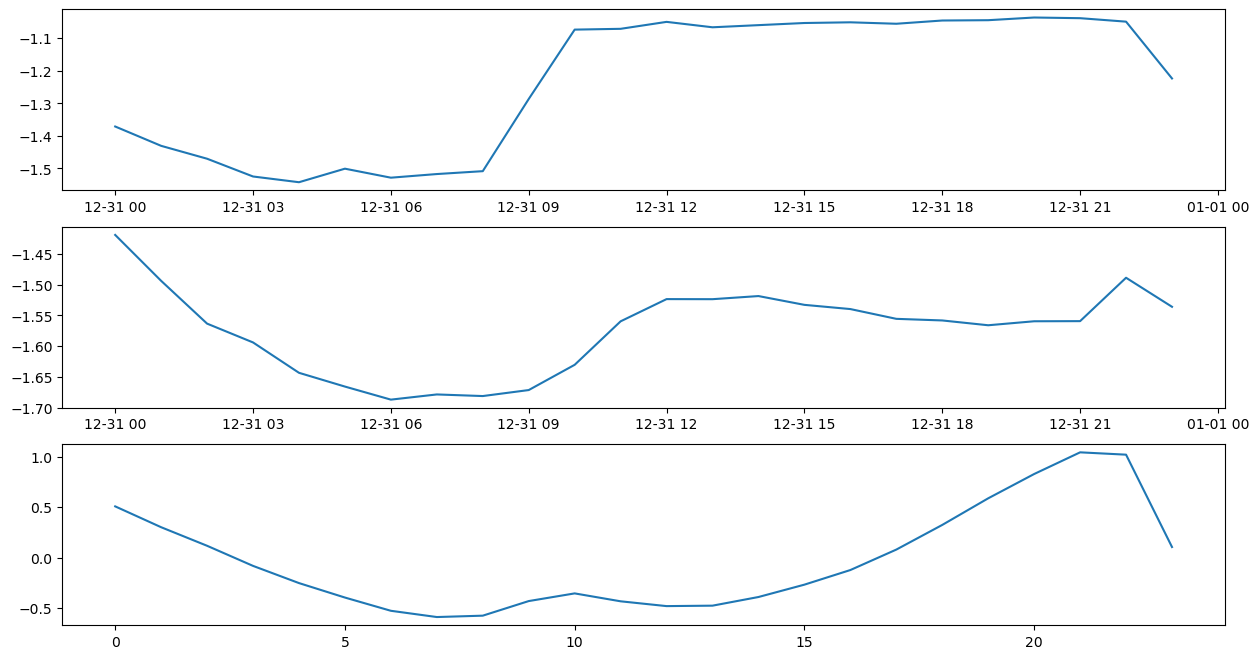

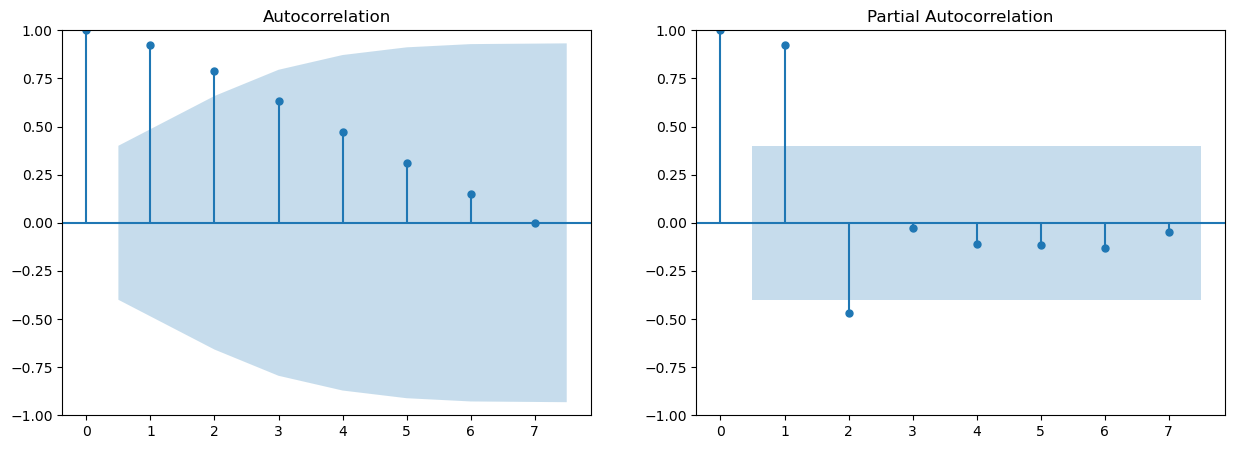

In [79]:
subestacion="BUIN"
filtro="substation=='{0}' and date.dt.year==2021 and date.dt.month==12 and date.dt.day==31".format(subestacion)
yd=ds_train.query(filtro)["consumption"]
xd=ds_train.query(filtro).index
filtro="substation=='{0}' and date.dt.year==2022 and date.dt.month==12 and date.dt.day==31".format(subestacion)
ytd=ds_test.query(filtro)["consumption"]
xtd=ds_test.query(filtro).index
c_yd_ytd=sm.tsa.stattools.ccf(yd, ytd);
fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 8)
axes[0].plot(xd,yd);
axes[1].plot(xtd,ytd);
axes[2].plot(c_yd_ytd);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(yd,lags=7,ax=axes[0]);
plot_pacf(yd,lags=7,method="ywm",ax=axes[1]);

In [35]:
model_shuffle = Sequential()
model_shuffle.add(Input(name="serie",shape=(8,1)))
model_shuffle.add(SimpleRNN(256))
model_shuffle.add(Dense(128))
model_shuffle.add(Dense(1, activation='linear'))
model_shuffle.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 256)               66048     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 99073 (387.00 KB)
Trainable params: 99073 (387.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
tag="rnn_buin_shuffle"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs\\fit\\" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_shuffle.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_shuffle.fit(yw, yt, batch_size=256, epochs=200, shuffle=True ,verbose=1,callbacks=[tensorboard_callback])
model_shuffle.save(log_dir+'\\model_buin_shuffle_{0}.keras'.format(tag))

Epoch 1/200
6/6 [==============================] - 2s 23ms/step - loss: 1.6401 - mse: 1.6401 - mae: 0.9906 - mape: 72.0004
Epoch 2/200
6/6 [==============================] - 0s 23ms/step - loss: 0.6045 - mse: 0.6045 - mae: 0.4341 - mape: 30.9945
Epoch 3/200
6/6 [==============================] - 0s 21ms/step - loss: 0.4655 - mse: 0.4655 - mae: 0.2685 - mape: 18.5041
Epoch 4/200
6/6 [==============================] - 0s 21ms/step - loss: 0.4409 - mse: 0.4409 - mae: 0.2056 - mape: 13.9772
Epoch 5/200
6/6 [==============================] - 0s 22ms/step - loss: 0.4173 - mse: 0.4173 - mae: 0.1778 - mape: 12.1341
Epoch 6/200
6/6 [==============================] - 0s 21ms/step - loss: 0.4188 - mse: 0.4188 - mae: 0.1587 - mape: 10.1265
Epoch 7/200
6/6 [==============================] - 0s 21ms/step - loss: 0.4126 - mse: 0.4126 - mae: 0.1658 - mape: 11.4192
Epoch 8/200
6/6 [==============================] - 0s 21ms/step - loss: 0.4019 - mse: 0.4019 - mae: 0.1090 - mape: 6.5646
Epoch 9/200
6/6 [

6/6 [==============================] - 0s 21ms/step - loss: 0.3949 - mse: 0.3949 - mae: 0.1066 - mape: 6.5971
Epoch 134/200
6/6 [==============================] - 0s 20ms/step - loss: 0.3926 - mse: 0.3926 - mae: 0.0982 - mape: 5.9916
Epoch 135/200
6/6 [==============================] - 0s 22ms/step - loss: 0.3924 - mse: 0.3924 - mae: 0.1035 - mape: 6.4953
Epoch 136/200
6/6 [==============================] - 0s 21ms/step - loss: 0.3921 - mse: 0.3921 - mae: 0.0903 - mape: 5.2981
Epoch 137/200
6/6 [==============================] - 0s 21ms/step - loss: 0.4008 - mse: 0.4008 - mae: 0.1407 - mape: 9.3627
Epoch 138/200
6/6 [==============================] - 0s 21ms/step - loss: 0.4052 - mse: 0.4052 - mae: 0.1318 - mape: 8.5480
Epoch 139/200
6/6 [==============================] - 0s 21ms/step - loss: 0.3967 - mse: 0.3967 - mae: 0.1008 - mape: 6.0042
Epoch 140/200
6/6 [==============================] - 0s 21ms/step - loss: 0.3958 - mse: 0.3958 - mae: 0.1259 - mape: 8.2655
Epoch 141/200
6/6 [===

#### Mejor resultado con shuffle:
rnn = model_shuffle.fit(yw, yt, batch_size=512, epochs=200, shuffle=True ,verbose=1,callbacks=[tensorboard_callback])

Epoch 193/200
3/3 [==============================] - 0s 43ms/step - loss: 0.3925 - mse: 0.3925 - mae: 0.0900 - mape: 5.2571

46/46 [==============================] - 0s 2ms/step


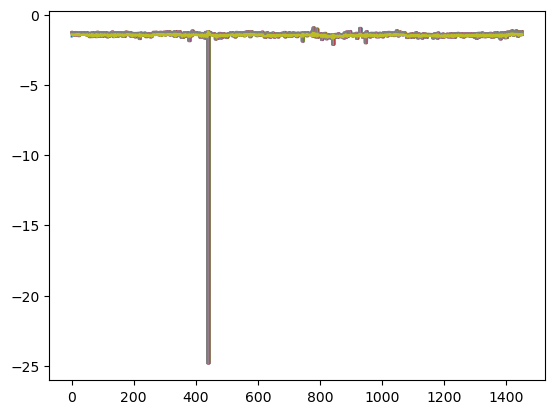

In [37]:
xw=[i for i in range(len(yw))]
yp=model_shuffle.predict(yw)
plt.plot(xw,yw,xw,yp)

In [38]:
#Attention
from keras.layers import Attention,MultiHeadAttention, Flatten
from keras.models import Model

In [39]:
d=128
input=Input(name="activity",shape=(8,1))
attention, _ = MultiHeadAttention(num_heads=1,key_dim=d)(input, input, input,return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_att_buin=Model(inputs=input,outputs=output)
model_att_buin.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 activity (InputLayer)       [(None, 8, 1)]               0         []                            
                                                                                                  
 multi_head_attention (Mult  ((None, 8, 1),               897       ['activity[0][0]',            
 iHeadAttention)              (None, 1, 8, 8))                       'activity[0][0]',            
                                                                     'activity[0][0]']            
                                                                                                  
 dense_4 (Dense)             (None, 8, 128)               256       ['multi_head_attention[0][0]']
                                                                                              

In [41]:
tag="mhatt_buin"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_att_buin.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_att_buin.fit(yw, yt, batch_size=256, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model_att_buin.save(log_dir+'/model_att_buin{0}.keras'.format(tag))

Epoch 1/200
6/6 [==============================] - 1s 23ms/step - loss: 0.4084 - mse: 0.4084 - mae: 0.1596 - mape: 10.6686
Epoch 2/200
6/6 [==============================] - 0s 23ms/step - loss: 0.4050 - mse: 0.4050 - mae: 0.1233 - mape: 7.6048
Epoch 3/200
6/6 [==============================] - 0s 24ms/step - loss: 0.3997 - mse: 0.3997 - mae: 0.1321 - mape: 8.6973
Epoch 4/200
6/6 [==============================] - 0s 23ms/step - loss: 0.3954 - mse: 0.3954 - mae: 0.1027 - mape: 6.1965
Epoch 5/200
6/6 [==============================] - 0s 23ms/step - loss: 0.3972 - mse: 0.3972 - mae: 0.1170 - mape: 7.4617
Epoch 6/200
6/6 [==============================] - 0s 23ms/step - loss: 0.3964 - mse: 0.3964 - mae: 0.1018 - mape: 6.1468
Epoch 7/200
6/6 [==============================] - 0s 24ms/step - loss: 0.3971 - mse: 0.3971 - mae: 0.1235 - mape: 8.0278
Epoch 8/200
6/6 [==============================] - 0s 24ms/step - loss: 0.3949 - mse: 0.3949 - mae: 0.0993 - mape: 5.9617
Epoch 9/200
6/6 [======

6/6 [==============================] - 0s 24ms/step - loss: 0.3966 - mse: 0.3966 - mae: 0.1054 - mape: 6.3903
Epoch 134/200
6/6 [==============================] - 0s 24ms/step - loss: 0.3944 - mse: 0.3944 - mae: 0.1209 - mape: 7.8018
Epoch 135/200
6/6 [==============================] - 0s 24ms/step - loss: 0.3966 - mse: 0.3966 - mae: 0.1081 - mape: 6.6679
Epoch 136/200
6/6 [==============================] - 0s 23ms/step - loss: 0.3967 - mse: 0.3967 - mae: 0.1084 - mape: 6.7056
Epoch 137/200
6/6 [==============================] - 0s 24ms/step - loss: 0.4014 - mse: 0.4014 - mae: 0.1394 - mape: 9.2956
Epoch 138/200
6/6 [==============================] - 0s 24ms/step - loss: 0.3972 - mse: 0.3972 - mae: 0.1015 - mape: 6.0248
Epoch 139/200
6/6 [==============================] - 0s 23ms/step - loss: 0.3946 - mse: 0.3946 - mae: 0.1133 - mape: 7.1915
Epoch 140/200
6/6 [==============================] - 0s 25ms/step - loss: 0.3947 - mse: 0.3947 - mae: 0.1135 - mape: 7.1912
Epoch 141/200
6/6 [===

#### Mejor resultado MHA sin Shuffle:
rnn = model_att_buin.fit(yw, yt, batch_size=512, epochs=20,verbose=1,callbacks=[tensorboard_callback])

Epoch 19/20

3/3 [==============================] - 0s 65ms/step - loss: 0.3983 - mse: 0.3983 - mae: 0.0997 - mape: 5.8328

46/46 [==============================] - 0s 3ms/step


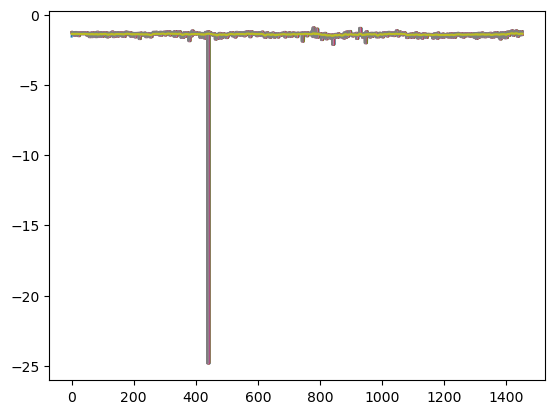

In [42]:
xw=[i for i in range(len(yw))]
yp=model_att_buin.predict(yw)
plt.plot(xw,yw,xw,yp)

In [43]:
d=128
input=Input(name="activity",shape=(8,1))
attention, _ = MultiHeadAttention(num_heads=1,key_dim=d)(input, input, input,return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_att_buin_shuffle=Model(inputs=input,outputs=output)
model_att_buin_shuffle.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 activity (InputLayer)       [(None, 8, 1)]               0         []                            
                                                                                                  
 multi_head_attention_1 (Mu  ((None, 8, 1),               897       ['activity[0][0]',            
 ltiHeadAttention)            (None, 1, 8, 8))                       'activity[0][0]',            
                                                                     'activity[0][0]']            
                                                                                                  
 dense_6 (Dense)             (None, 8, 128)               256       ['multi_head_attention_1[0][0]
                                                                    ']                      

In [45]:
tag="mhatt_buin_shuffle"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_att_buin_shuffle.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_att_buin_shuffle.fit(yw, yt, batch_size=256, shuffle=True, epochs=200, verbose=1,callbacks=[tensorboard_callback])
model_att_buin_shuffle.save(log_dir+'/model_att_buin_shuffle{0}.keras'.format(tag))


Epoch 1/200
6/6 [==============================] - 1s 24ms/step - loss: 0.4078 - mse: 0.4078 - mae: 0.1570 - mape: 10.4681
Epoch 2/200
6/6 [==============================] - 0s 24ms/step - loss: 0.4044 - mse: 0.4044 - mae: 0.1216 - mape: 7.4948
Epoch 3/200
6/6 [==============================] - 0s 23ms/step - loss: 0.3995 - mse: 0.3995 - mae: 0.1295 - mape: 8.4794
Epoch 4/200
6/6 [==============================] - 0s 25ms/step - loss: 0.3951 - mse: 0.3951 - mae: 0.1030 - mape: 6.2417
Epoch 5/200
6/6 [==============================] - 0s 24ms/step - loss: 0.3970 - mse: 0.3970 - mae: 0.1140 - mape: 7.2154
Epoch 6/200
6/6 [==============================] - 0s 24ms/step - loss: 0.3962 - mse: 0.3962 - mae: 0.1017 - mape: 6.1555
Epoch 7/200
6/6 [==============================] - 0s 25ms/step - loss: 0.3967 - mse: 0.3967 - mae: 0.1206 - mape: 7.7868
Epoch 8/200
6/6 [==============================] - 0s 23ms/step - loss: 0.3947 - mse: 0.3947 - mae: 0.0994 - mape: 5.9814
Epoch 9/200
6/6 [======

6/6 [==============================] - 0s 26ms/step - loss: 0.3966 - mse: 0.3966 - mae: 0.1042 - mape: 6.2867
Epoch 134/200
6/6 [==============================] - 0s 24ms/step - loss: 0.3945 - mse: 0.3945 - mae: 0.1221 - mape: 7.9036
Epoch 135/200
6/6 [==============================] - 0s 24ms/step - loss: 0.3966 - mse: 0.3966 - mae: 0.1064 - mape: 6.5177
Epoch 136/200
6/6 [==============================] - 0s 25ms/step - loss: 0.3966 - mse: 0.3966 - mae: 0.1094 - mape: 6.7996
Epoch 137/200
6/6 [==============================] - 0s 23ms/step - loss: 0.4006 - mse: 0.4006 - mae: 0.1364 - mape: 9.0455
Epoch 138/200
6/6 [==============================] - 0s 25ms/step - loss: 0.3962 - mse: 0.3962 - mae: 0.0994 - mape: 5.8873
Epoch 139/200
6/6 [==============================] - 0s 26ms/step - loss: 0.3942 - mse: 0.3942 - mae: 0.1125 - mape: 7.1313
Epoch 140/200
6/6 [==============================] - 0s 25ms/step - loss: 0.3943 - mse: 0.3943 - mae: 0.1121 - mape: 7.0777
Epoch 141/200
6/6 [===

### Mejor resultado con shuffle (MHattention):¶
rnn = model_att_buin_shuffle.fit(yw, yt, batch_size=512, shuffle=True, epochs=20, verbose=1,callbacks=[tensorboard_callback])

Epoch 4/20
3/3 [==============================] - 0s 59ms/step - loss: 0.3989 - mse: 0.3989 - mae: 0.1004 - mape: 5.8608

46/46 [==============================] - 0s 2ms/step


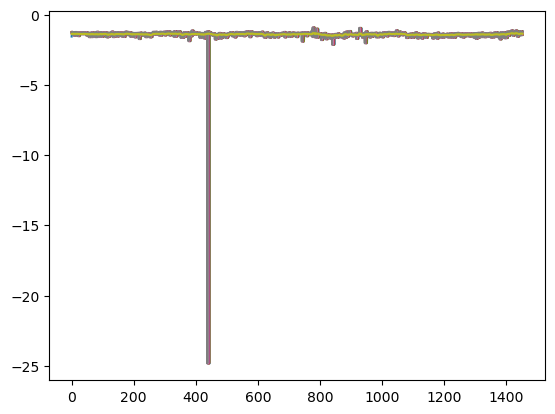

In [47]:
xw=[i for i in range(len(yw))]
yp=model_att_buin_shuffle.predict(yw)
plt.plot(xw,yw,xw,yp)

In [48]:
yw.shape

(1453, 8)

In [49]:
attention_output,attention_scores=model_att_buin_shuffle.layers[1](yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                return_attention_scores=True)

In [50]:
attention_scores.shape

TensorShape([1, 1, 8, 8])

In [51]:
attention_output.shape

TensorShape([1, 8, 1])

In [52]:
import seaborn as sb

In [53]:
timesteps = ["t"+str(i) for i in range(8)]
timesteps.reverse()

In [54]:
timesteps

['t7', 't6', 't5', 't4', 't3', 't2', 't1', 't0']

<Axes: >

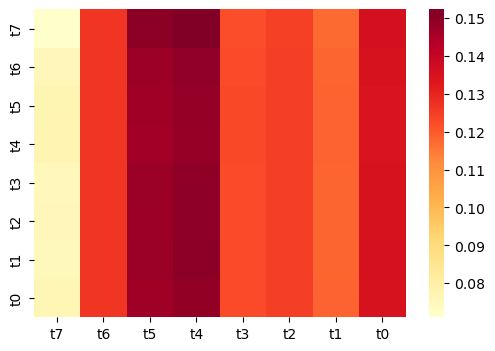

In [55]:
xticklb = timesteps
yticklb = timesteps
figure, axis = plt.subplots(1, 1)
figure.set_figheight(4)
figure.set_figwidth(6)
att=attention_scores[0,0,:,:]
sb.heatmap(att, xticklabels=xticklb, yticklabels=yticklb, cmap="YlOrRd",ax=axis)

In [56]:
W=model_att_buin_shuffle.layers[1].get_weights()

In [57]:
len(W)

8

In [58]:
componentes=["query","query_bias","key","key_bias","value","value_bias",
             "projection","projection"]
for name, out in zip(componentes,W):
    print(name, out.shape)

query (1, 1, 128)
query_bias (1, 128)
key (1, 1, 128)
key_bias (1, 128)
value (1, 1, 128)
value_bias (1, 128)
projection (1, 128, 1)
projection (1,)


In [59]:
#No multihead attention, solo Attention
d=128
input=Input(name="activity",shape=(8,1))
q = Dense(name="wq",units=d)(input)
k = Dense(name="wk",units=d)(input)
v = Dense(name="wv",units=d)(input)
attention, _= Attention()([q, v, k],return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_att_buin_2=Model(inputs=input,outputs=output)
model_att_buin_2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 activity (InputLayer)       [(None, 8, 1)]               0         []                            
                                                                                                  
 wq (Dense)                  (None, 8, 128)               256       ['activity[0][0]']            
                                                                                                  
 wv (Dense)                  (None, 8, 128)               256       ['activity[0][0]']            
                                                                                                  
 wk (Dense)                  (None, 8, 128)               256       ['activity[0][0]']            
                                                                                            

In [60]:
tag="att"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_att_buin_2.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_att_buin_2.fit(yw, yt, batch_size=256, shuffle=False, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model_att_buin_2.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200
6/6 [==============================] - 1s 21ms/step - loss: 1.6436 - mse: 1.6436 - mae: 0.9786 - mape: 70.6157
Epoch 2/200
6/6 [==============================] - 0s 23ms/step - loss: 0.6431 - mse: 0.6431 - mae: 0.4280 - mape: 30.1498
Epoch 3/200
6/6 [==============================] - 0s 20ms/step - loss: 0.4986 - mse: 0.4986 - mae: 0.3384 - mape: 24.2897
Epoch 4/200
6/6 [==============================] - 0s 21ms/step - loss: 0.4488 - mse: 0.4488 - mae: 0.2592 - mape: 18.5528
Epoch 5/200
6/6 [==============================] - 0s 21ms/step - loss: 0.4159 - mse: 0.4159 - mae: 0.1530 - mape: 9.5796
Epoch 6/200
6/6 [==============================] - 0s 21ms/step - loss: 0.4176 - mse: 0.4176 - mae: 0.1539 - mape: 9.7317
Epoch 7/200
6/6 [==============================] - 0s 21ms/step - loss: 0.3987 - mse: 0.3987 - mae: 0.1265 - mape: 8.2634
Epoch 8/200
6/6 [==============================] - 0s 21ms/step - loss: 0.4003 - mse: 0.4003 - mae: 0.1477 - mape: 9.9848
Epoch 9/200
6/6 [===

6/6 [==============================] - 0s 23ms/step - loss: 0.3941 - mse: 0.3941 - mae: 0.1053 - mape: 6.5195
Epoch 134/200
6/6 [==============================] - 0s 25ms/step - loss: 0.3941 - mse: 0.3941 - mae: 0.1053 - mape: 6.5200
Epoch 135/200
6/6 [==============================] - 0s 22ms/step - loss: 0.3941 - mse: 0.3941 - mae: 0.1053 - mape: 6.5205
Epoch 136/200
6/6 [==============================] - 0s 25ms/step - loss: 0.3941 - mse: 0.3941 - mae: 0.1053 - mape: 6.5210
Epoch 137/200
6/6 [==============================] - 0s 23ms/step - loss: 0.3941 - mse: 0.3941 - mae: 0.1053 - mape: 6.5215
Epoch 138/200
6/6 [==============================] - 0s 22ms/step - loss: 0.3941 - mse: 0.3941 - mae: 0.1053 - mape: 6.5220
Epoch 139/200
6/6 [==============================] - 0s 21ms/step - loss: 0.3941 - mse: 0.3941 - mae: 0.1053 - mape: 6.5225
Epoch 140/200
6/6 [==============================] - 0s 22ms/step - loss: 0.3941 - mse: 0.3941 - mae: 0.1053 - mape: 6.5230
Epoch 141/200
6/6 [===

El mejor valor fue obtenido sin shuffle, pero por lo general con shuffle los resultados eran mejores en cada batch size.

46/46 [==============================] - 0s 2ms/step


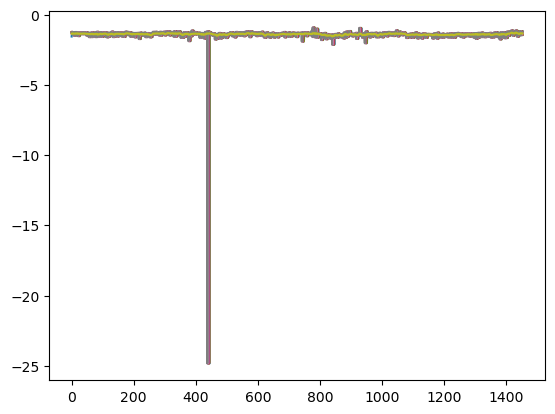

In [61]:
xw=[i for i in range(len(yw))]
yp=model_att_buin_2.predict(yw)
plt.plot(xw,yw,xw,yp)

In [62]:
d=128
input=Input(name="activity",shape=(8,1))
q = Dense(name="wq",units=d)(input)
k = Dense(name="wk",units=d)(input)
v = Dense(name="wv",units=d)(input)
attention, _= Attention()([q, v, k],return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_att_buin_2_shuffle=Model(inputs=input,outputs=output)
model_att_buin_2_shuffle.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 activity (InputLayer)       [(None, 8, 1)]               0         []                            
                                                                                                  
 wq (Dense)                  (None, 8, 128)               256       ['activity[0][0]']            
                                                                                                  
 wv (Dense)                  (None, 8, 128)               256       ['activity[0][0]']            
                                                                                                  
 wk (Dense)                  (None, 8, 128)               256       ['activity[0][0]']            
                                                                                            

In [63]:
tag="att"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_att_buin_2_shuffle.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_att_buin_2_shuffle.fit(yw, yt, batch_size=256, shuffle=True, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model_att_buin_2_shuffle.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200
6/6 [==============================] - 1s 21ms/step - loss: 1.0365 - mse: 1.0365 - mae: 0.6736 - mape: 48.3054
Epoch 2/200
6/6 [==============================] - 0s 22ms/step - loss: 0.6633 - mse: 0.6633 - mae: 0.5224 - mape: 37.9846
Epoch 3/200
6/6 [==============================] - 0s 21ms/step - loss: 0.4559 - mse: 0.4559 - mae: 0.2417 - mape: 16.2197
Epoch 4/200
6/6 [==============================] - 0s 21ms/step - loss: 0.4569 - mse: 0.4569 - mae: 0.2312 - mape: 15.3854
Epoch 5/200
6/6 [==============================] - 0s 21ms/step - loss: 0.4193 - mse: 0.4193 - mae: 0.1860 - mape: 12.9173
Epoch 6/200
6/6 [==============================] - 0s 21ms/step - loss: 0.4077 - mse: 0.4077 - mae: 0.1514 - mape: 10.2140
Epoch 7/200
6/6 [==============================] - 0s 21ms/step - loss: 0.4018 - mse: 0.4018 - mae: 0.1096 - mape: 6.5114
Epoch 8/200
6/6 [==============================] - 0s 21ms/step - loss: 0.3977 - mse: 0.3977 - mae: 0.1039 - mape: 6.2983
Epoch 9/200
6/6 [=

6/6 [==============================] - 0s 23ms/step - loss: 0.3971 - mse: 0.3971 - mae: 0.1032 - mape: 6.2198
Epoch 134/200
6/6 [==============================] - 0s 22ms/step - loss: 0.3950 - mse: 0.3950 - mae: 0.1188 - mape: 7.6206
Epoch 135/200
6/6 [==============================] - 0s 22ms/step - loss: 0.3972 - mse: 0.3972 - mae: 0.1066 - mape: 6.5413
Epoch 136/200
6/6 [==============================] - 0s 21ms/step - loss: 0.3974 - mse: 0.3974 - mae: 0.1065 - mape: 6.5504
Epoch 137/200
6/6 [==============================] - 0s 21ms/step - loss: 0.4021 - mse: 0.4021 - mae: 0.1380 - mape: 9.1646
Epoch 138/200
6/6 [==============================] - 0s 21ms/step - loss: 0.3977 - mse: 0.3977 - mae: 0.1001 - mape: 5.9269
Epoch 139/200
6/6 [==============================] - 0s 22ms/step - loss: 0.3951 - mse: 0.3951 - mae: 0.1112 - mape: 7.0193
Epoch 140/200
6/6 [==============================] - 0s 23ms/step - loss: 0.3952 - mse: 0.3952 - mae: 0.1101 - mape: 6.9082
Epoch 141/200
6/6 [===

Epoch 31/100

3/3 [==============================] - 0s 64ms/step - loss: 0.3956 - mse: 0.3956 - mae: 0.0958 - mape: 5.6531

46/46 [==============================] - 0s 2ms/step


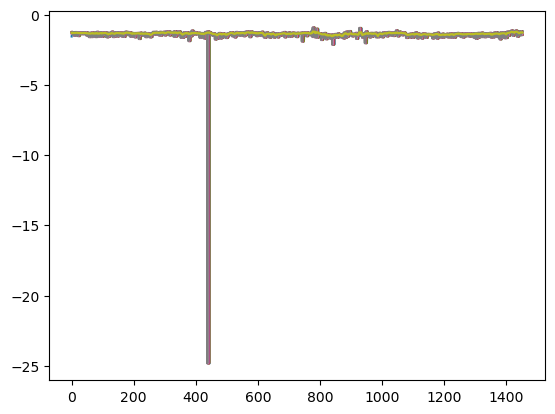

In [77]:
xw=[i for i in range(len(yw))]
yp=model_att_buin_2_shuffle.predict(yw)
plt.plot(xw,yw,xw,yp)

In [119]:
attention_output,attention_scores=model_att_buin_2.layers[4]([yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1)],
                return_attention_scores=True)

<Axes: >

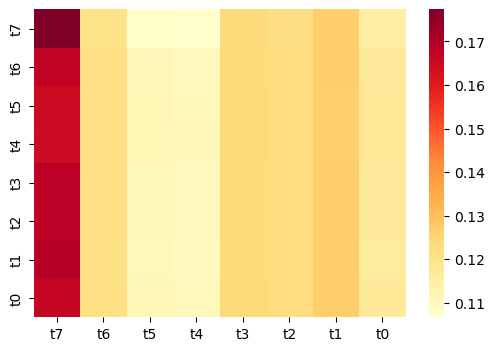

In [120]:
xticklb = timesteps
yticklb = timesteps
figure, axis = plt.subplots(1, 1)
figure.set_figheight(4)
figure.set_figwidth(6)
att=attention_scores[0,:,:]
sb.heatmap(att, xticklabels=xticklb, yticklabels=yticklb, cmap="YlOrRd",ax=axis)

In [121]:
attention_output.shape

TensorShape([1, 8, 1])

In [122]:
attention_scores.shape

TensorShape([1, 8, 8])

In [123]:
yw.shape

(1453, 8)

In [124]:
W=model_att_buin_2.layers[5].get_weights()
for i in range(len(W)):
    print(i,"=",W[i].shape)

0 = (128, 128)
1 = (128,)
